# Advanced kNN Regression
Objective: Implement kNN regression with basic feature processing, model optimization, and performance evaluation on a real-world dataset.

# Dataset Loading

In [10]:
import pandas as pd
import numpy as np

# The dataset URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Fetching the data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Splitting the data
data = np.hstack([raw_df.values[::2, :13], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]

# Creating a DataFrame
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
boston_df = pd.DataFrame(data, columns=column_names)

# Displaying the first 5 rows
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Feature Processing

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

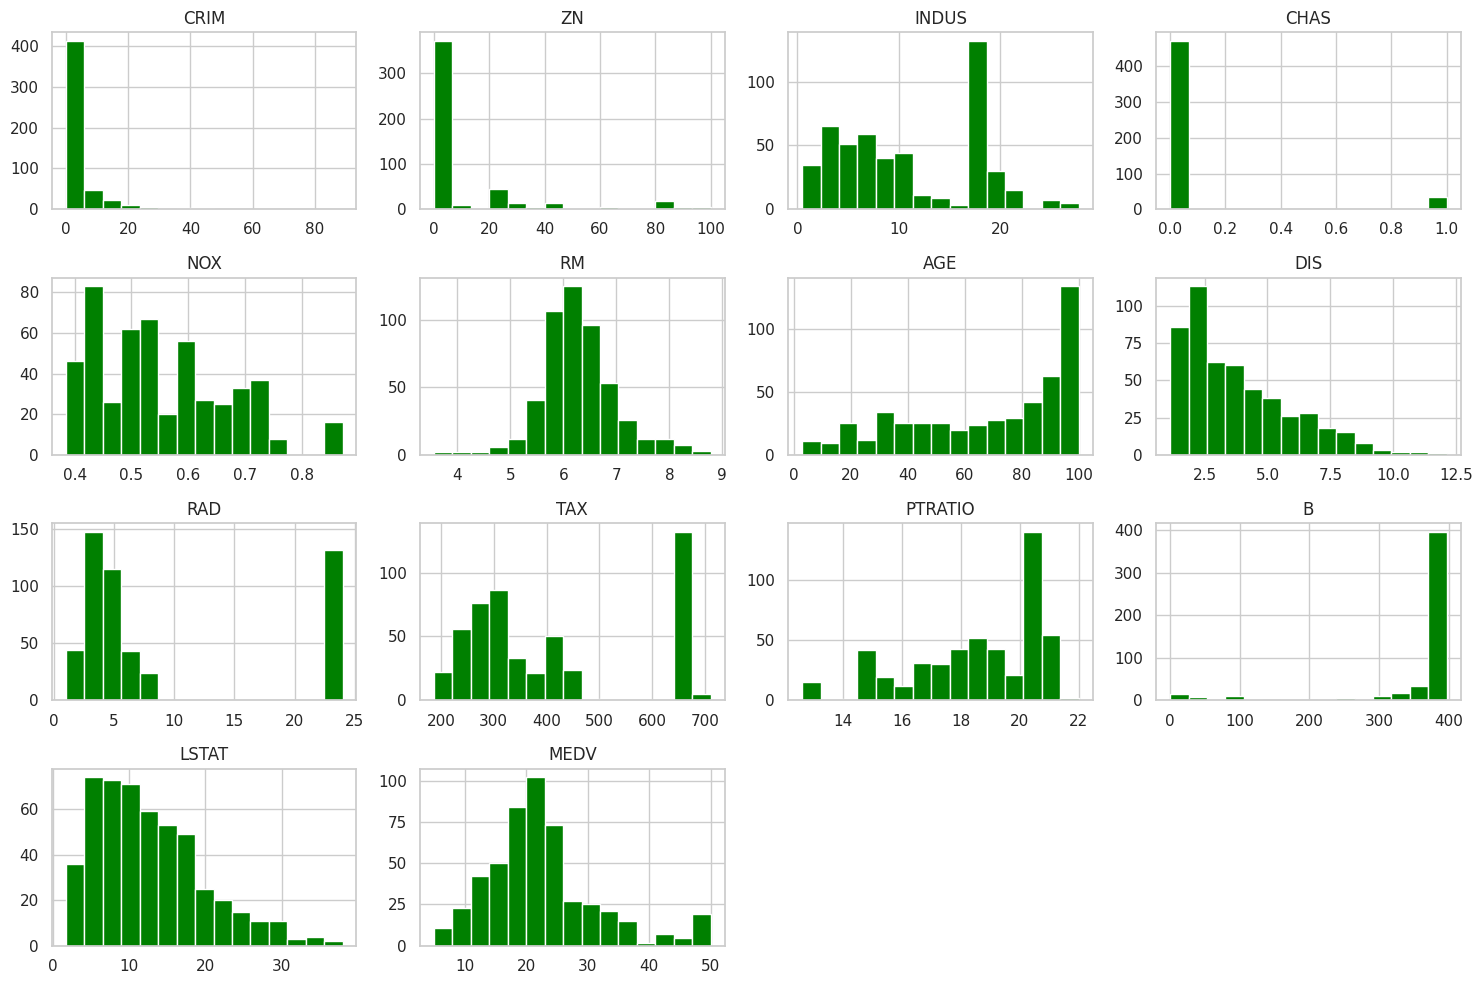

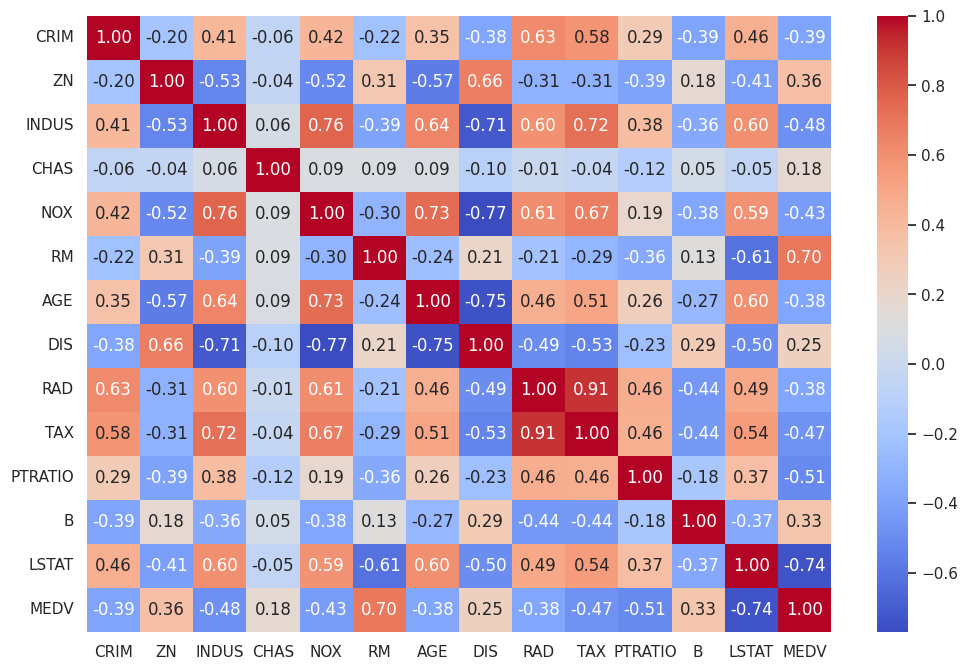

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2  
         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  5

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(boston_df.describe())

# Checking for missing values
print(boston_df.isnull().sum())

# Visualizing distributions of features
sns.set(style='whitegrid')
boston_df.hist(bins=15, figsize=(15, 10), layout=(4, 4), color='green')
plt.tight_layout()
plt.show()

# Pairwise correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Standardizing the features
scaler = StandardScaler()
features = boston_df.drop('MEDV', axis=1)  # Drop the target variable
features_standardized = scaler.fit_transform(features)

# Replacing original features with standardized features
for i, col in enumerate(features.columns):
    boston_df[col] = features_standardized[:, i]

# Displaying the first 5 rows of the standardized DataFrame
print(boston_df.head())

# Checking the new summary statistics to confirm standardization
print(boston_df.describe().round(2))

The exploratory data analysis of the Boston Housing dataset indicates varied distributions across features, some skewed (CRIM, ZN, B) and others more normalized (RM) with notable strong positive correlations between RAD and TAX (0.91) and negative correlations between DIS and NOX (-0.77). After standardization, all features exhibit a mean of approximately zero and a standard deviation close to one confirming successful scaling for further modeling tasks.

# Hyperparameter Tuning

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training (70%), validation (15%) and test set (15%)
X_train, X_temp, y_train, y_temp = train_test_split(features_standardized, boston_df['MEDV'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# List of k values to test
k_values = [3, 5, 7, 10]

# Dictionary to store mean squared errors for each value of k
mse_scores = {}

# Training and validating the model for each k value
for k in k_values:
    # Creating KNN regressor with the current value of k
    knn = KNeighborsRegressor(n_neighbors=k)

    # Training the regressor on the training data
    knn.fit(X_train, y_train)

    # Making predictions on the validation data
    y_pred = knn.predict(X_val)

    # Calculating the mean squared error on the validation data
    mse = mean_squared_error(y_val, y_pred)

    # Storing the mse in the dictionary
    mse_scores[k] = mse
    print(f'MSE for k={k}: {mse}')

# Finding the best k value with the lowest MSE
best_k = min(mse_scores, key=mse_scores.get)
print(f'Best k value: {best_k}')

MSE for k=3: 9.784356725146196
MSE for k=5: 10.259852631578946
MSE for k=7: 11.512124060150375
MSE for k=10: 11.878588157894734
Best k value: 3


The hyperparameter tuning for the K-Nearest Neighbors regressor on the validation set revealed that k=3 yields the lowest mean squared error (MSE) of approximately 9.78 suggesting it as the optimal number of neighbors for the model. Larger values of k (5, 7, and 10) resulted in higher MSEs indicating worse prediction accuracy on the validation set for this dataset.

# Distance Weighting

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Creating KNN regressor with the optimal number of neighbors and distance weighting
knn_weighted = KNeighborsRegressor(n_neighbors=best_k, weights='distance')

# Training the regressor on the training data
knn_weighted.fit(X_train, y_train)

# Making predictions on the validation data
y_pred_weighted = knn_weighted.predict(X_val)

# Calculating the mean squared error on the validation data using distance weighting
mse_weighted = mean_squared_error(y_val, y_pred_weighted)

print(f'MSE with distance weighting for k={best_k}: {mse_weighted}')

MSE with distance weighting for k=3: 8.801346360616911


Implementing distance weighting in the K-Nearest Neighbors algorithm with k=3 has resulted in a mean squared error of approximately 8.80 on the validation set. This demonstrates that the model with weighted distances potentially improves the prediction accuracy compared to the unweighted distances where closer neighbors have a greater influence on the prediction.

# Performance Metrics





In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test data
y_test_pred = knn_weighted.predict(X_test)

# Calculating the mean squared error on the test data
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

# Calculating the R-squared score on the test data
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test R-squared: {test_r2}')

Test MSE: 24.319580666120505
Test R-squared: 0.6940138951218369


The K-Nearest Neighbors model with distance weighting yielded a mean squared error of approximately 24.32 on the test set indicating the average squared difference between the predicted and actual values. The R-squared score is approximately 0.69 suggesting that the model explains around 69% of the variance in the target variable for the test data.

# Result Analysis

The choice of k in kNN is crucial because it determines how many neighbors influence the prediction for each data point. A small k makes the model sensitive to noise in the dataset while a large k can smooth out the prediction too much leading to underfitting. In the case of the Boston Housing dataset, a k of 3 is found to be optimal based on validation set performance which suggests a balance between overfitting and underfitting for this particular dataset.

The kNN algorithm has several limitations for regression tasks. It is computationally intensive for large datasets because it requires storing the entire training dataset and calculating distances between points for each prediction. kNN also suffers in high-dimensional spaces (curse of dimensionality) because distances become less meaningful leading to poorer performance. Distance weighting mitigate some of these issues by giving more importance to closer neighbors potentially improving predictions for non-linear data distributions. However, it still does not change the fact that kNN struggle with extrapolation and influenced by irrelevant features.

# Summary

In the exploratory data analysis of the Boston Housing dataset, we observed varied feature distributions some of which are highly skewed while others, such as the number of rooms (RM) showed a more normal distribution. Correlation analysis indicated strong relationships between certain features such as the high positive correlation between accessibility to radial highways (RAD) and property tax rate (TAX).

The choice of k in the k-Nearest Neighbors algorithm significantly impacts model performance. A smaller k lead to models that capture noise and overfit the training data whereas a larger k oversmooth and underfit failing to capture the complexities of the data. For this analysis, k=3 is determined to be optimal based on the lowest mean squared error on the validation set suggesting a balance between bias and variance.

The performance of the final model with k=3 and distance weighting is evaluated using the MSE and R-squared metrics. An MSE of approximately 24.32 on the test set signifies the average squared prediction error and an R-squared of 0.69 indicates that the model explains 69% of the variance in the target variable which is a moderate level of predictive power.

For the limitations of kNN regression, the algorithm suffer from the curse of dimensionality where performance degrades with an increase in feature space dimensionality. It is also sensitive to the scale of the data making feature scaling crucial. The kNN model's reliance on local information make it susceptible to noise in the data. Distance weighting mitigate some of these issues by giving more weight to nearer neighbors potentially enhancing model performance by reducing the influence of outliers and noisy data points. However, the choice of the distance function and the way the distance is calculated significantly affect the model's predictions and inappropriate weighting lead to biases towards certain data regions.